In [10]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_am_asso_50Hz_reci = data[(data['Ptl_note']=='E_I_50Hz_Associ_AM251')&(data['Reci']==1)]

In [4]:
data_am_asso_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
165,2018021301,33,3,1,1,0,1,21,"24,25",22,0,No change,E_I_50Hz_Associ_AM251
166,2018021302,33,3,1,1,0,1,"17,18,19,20","22,23,24,25",22,0,No change,E_I_50Hz_Associ_AM251
167,2018021303,33,3,1,1,1,1,5,7,22,0,No change,E_I_50Hz_Associ_AM251
168,2018022801,26,2,1,1,0,1,5,"7,8,9,10,11",22,0,No change,E_I_50Hz_Associ_AM251
169,2018022802,26,2,1,1,0,1,29,31,22,175,No change,E_I_50Hz_Associ_AM251
170,2018030101,27,2,1,1,0,1,26,"29,29,29,29",22,0,No change,E_I_50Hz_Associ_AM251
171,2018030102,27,2,1,1,0,1,"9,10,11,12,13","16,16,16,17,17,17,17",22,0,Weak LTD,E_I_50Hz_Associ_AM251


/src/Patch_ana/Patch_ana/patch_pip.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  ir = 0.005 / np.mean(trial_demean[ir_region]) * 1e-6 - 20


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


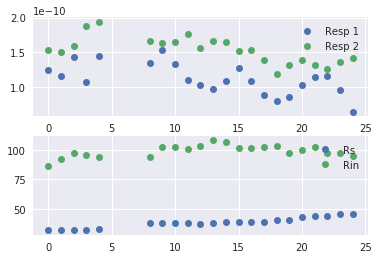

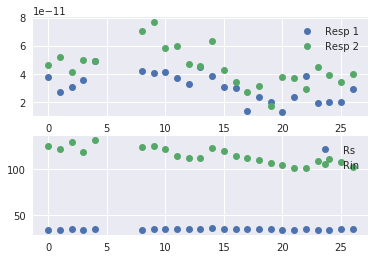

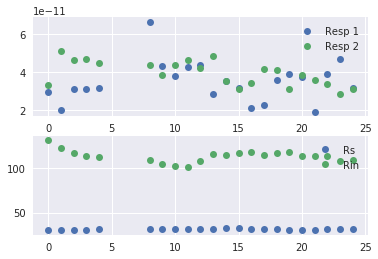

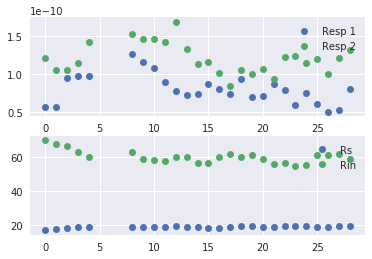

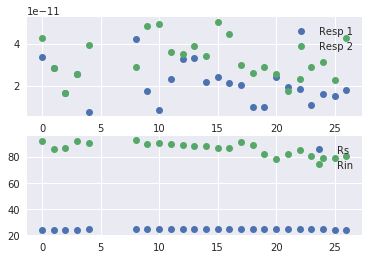

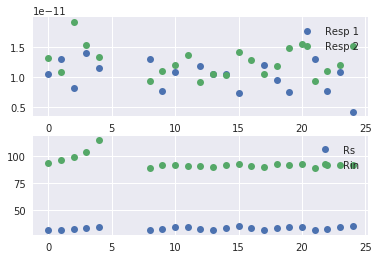

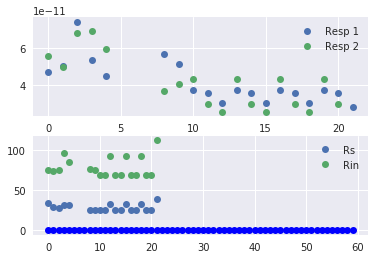

In [6]:
patch_pip.df_ana(data_am_asso_50Hz_reci,'/data/data_am_asso_50Hz_reci', end_ana=[24, 28,24,30,27,24, 20])
am_asso_50Hz_reci = pd.read_pickle('/dat`a/data_am_asso_50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(am_asso_50Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [8]:
am_asso_50Hz_reci['Before'].index

Int64Index([165, 166, 167, 168, 169, 170, 171], dtype='int64')

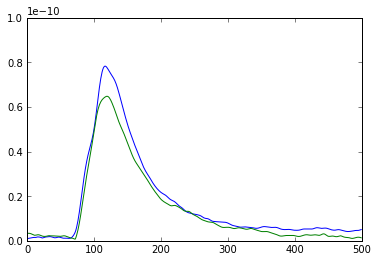

In [27]:
sample_id = 168
plt.plot(np.nanmean(np.vstack(am_asso_50Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(am_asso_50Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))
plt.ylim([0, 1e-10])
with PdfPages('/data/Figure4_20.pdf') as pdf:
    pdf.savefig()

In [ ]:
elimi = np.array([24, 28,24,30,27,24, 20])
elimi_sr = pd.Series(elimi, index=data_am_asso_50Hz_reci.index)
am_asso_50Hz_reci['elimi']=elimi_sr

In [ ]:
# am_asso_50Hz_reci.to_pickle('/data/ana_am_asso_50')